# House Price Prediction Using Advanced Regression

## Goal :
    * Creative feature engineering 
    * Advanced regression techniques like random forest and gradient boosting for prediction of Price of the House

# Dataset Information
* It contains 1460 training data points and 80 features that might help us predict the selling price of a house

# Data fields
1.	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2.	MSSubClass: The building class
3.	MSZoning: The general zoning classification
4.	LotFrontage: Linear feet of street connected to property
5.	LotArea: Lot size in square feet
6.	Street: Type of road access
7.	Alley: Type of alley access
8.	LotShape: General shape of property
9.	LandContour: Flatness of the property
10.	Utilities: Type of utilities available
11.	LotConfig: Lot configuration
12.	LandSlope: Slope of property
13.	Neighborhood: Physical locations within Ames city limits
14.	Condition1: Proximity to main road or railroad
15.	Condition2: Proximity to main road or railroad (if a second is present)
16.	BldgType: Type of dwelling
17.	HouseStyle: Style of dwelling
18.	OverallQual: Overall material and finish quality
19.	OverallCond: Overall condition rating
20.	YearBuilt: Original construction date
21.	YearRemodAdd: Remodel date
22.	RoofStyle: Type of roof
23.	RoofMatl: Roof material
24.	Exterior1st: Exterior covering on house
25.	Exterior2nd: Exterior covering on house (if more than one material)
26.	MasVnrType: Masonry veneer type
27.	MasVnrArea: Masonry veneer area in square feet
28.	ExterQual: Exterior material quality
29.	ExterCond: Present condition of the material on the exterior
30.	Foundation: Type of foundation
31.	BsmtQual: Height of the basement
32.	BsmtCond: General condition of the basement
33.	BsmtExposure: Walkout or garden level basement walls
34.	BsmtFinType1: Quality of basement finished area
35.	BsmtFinSF1: Type 1 finished square feet
36.	BsmtFinType2: Quality of second finished area (if present)
37.	BsmtFinSF2: Type 2 finished square feet
38.	BsmtUnfSF: Unfinished square feet of basement area
39.	TotalBsmtSF: Total square feet of basement area
40.	Heating: Type of heating
41.	HeatingQC: Heating quality and condition
42.	CentralAir: Central air conditioning
43.	Electrical: Electrical system
44.	1stFlrSF: First Floor square feet
45.	2ndFlrSF: Second floor square feet
46.	LowQualFinSF: Low quality finished square feet (all floors)
47.	GrLivArea: Above grade (ground) living area square feet
48.	BsmtFullBath: Basement full bathrooms
49.	BsmtHalfBath: Basement half bathrooms
50.	FullBath: Full bathrooms above grade
51.	HalfBath: Half baths above grade
52.	Bedroom: Number of bedrooms above basement level
53.	Kitchen: Number of kitchens
54.	KitchenQual: Kitchen quality
55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.	Functional: Home functionality rating
57.	Fireplaces: Number of fireplaces
58.	FireplaceQu: Fireplace quality
59.	GarageType: Garage location
60.	GarageYrBlt: Year garage was built
61.	GarageFinish: Interior finish of the garage
62.	GarageCars: Size of garage in car capacity
63.	GarageArea: Size of garage in square feet
64.	GarageQual: Garage quality
65.	GarageCond: Garage condition
66.	PavedDrive: Paved driveway
67.	WoodDeckSF: Wood deck area in square feet
68.	OpenPorchSF: Open porch area in square feet
69.	EnclosedPorch: Enclosed porch area in square feet
70.	3SsnPorch: Three season porch area in square feet
71.	ScreenPorch: Screen porch area in square feet
72.	PoolArea: Pool area in square feet
73.	PoolQC: Pool quality
74.	Fence: Fence quality
75.	MiscFeature: Miscellaneous feature not covered in other categories
76.	MiscVal: $Value of miscellaneous feature
77.	MoSold: Month Sold
78.	YrSold: Year Sold
79.	SaleType: Type of sale
80.	SaleCondition: Condition of sale


In [111]:
# importing pandas
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [112]:
#loading the dataset
df = pd.read_csv("Data/data.csv",index_col="Id")

In [113]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
#checking the shape of dataset
df.shape

(1460, 80)

In [115]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [116]:
# checking for null values
df.isnull().sum()[:40]

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
dtype: int64

In [117]:
# checking for null values
df.isnull().sum()[40:]

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

#### There are many NaN datapoints in the dataset

Since most of the rows may have NaN values, df.dropna() doesnt work here

#### Dropping the most null columns with more than 50 %
        * Alley
        * PoolQC
        * Fence
        * MiscFeature

In [118]:
df = df.drop(["Alley"],axis=1)

In [119]:
df = df.drop(["PoolQC"],axis =1 )

In [120]:
df = df.drop(["Fence"],axis =1 )

In [121]:
df = df.drop(["MiscFeature"],axis =1 )

In [122]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Missing values Columns with less than 50% are :
        * Electrical        1
        * LotFrontage      259
        * MasVnrType        8
        * MasVnrArea        8
        * BsmtQual          37
        * BsmtCond          37
        * BsmtExposure      38
        * BsmtFinType1      37
        * BsmtFinType2      38
        * FireplaceQu       680
        * GarageType         81
        * GarageYrBlt        81
        * GarageFinish       81
        * GarageQual         81
        * GarageCond         81

In [123]:
## instead of drops all these rows directly, fill it using mean, median and mode for some columns and also drop rows accordingly

In [124]:
df[df.Electrical.isnull()== True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [125]:
df[df.Electrical.isnull()== True].index

Int64Index([1380], dtype='int64', name='Id')

In [126]:
df = df.drop([1380],axis = 0)

#### LotFrontage is a continuous values hence we can replace it using mean or median

# plotting LotFrontage

<AxesSubplot:xlabel='Id'>

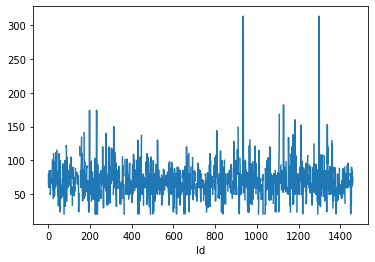

In [127]:
df.LotFrontage.plot()

### From the above plot we can say that most datapoints have LotFrontage between 50 and 100

#### so we will fill it mean

In [128]:
df.LotFrontage.mean()

70.0475

In [129]:
df.LotFrontage.isnull().sum()

259

In [130]:
df["LotFrontage"] = df.LotFrontage.fillna(df.LotFrontage.mean())

In [131]:
df.LotFrontage.isnull().sum()

0

<AxesSubplot:xlabel='Id'>

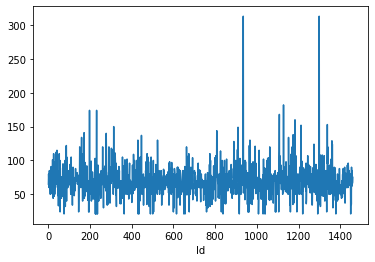

In [132]:
df.LotFrontage.plot()

##### REMOVING 8 ROWS OF MasVnrType MasVnrArea NULL VALUES

In [133]:
df[df.MasVnrType.isnull()== True].index

Int64Index([235, 530, 651, 937, 974, 978, 1244, 1279], dtype='int64', name='Id')

In [134]:
df[df.MasVnrArea.isnull()== True].index

Int64Index([235, 530, 651, 937, 974, 978, 1244, 1279], dtype='int64', name='Id')

In [135]:
df = df.drop(df[df.MasVnrArea.isnull()== True].index,axis=0)

In [136]:
df[df.MasVnrArea.isnull()== True].index

Int64Index([], dtype='int64', name='Id')

In [137]:
df[df.MasVnrType.isnull()== True].index

Int64Index([], dtype='int64', name='Id')

##### HANDLING MISSING VALUE ROWS OF BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [138]:
df[df.BsmtQual.isnull()== True].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180, 1217,
            1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

In [139]:
df[df.BsmtCond.isnull()== True].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180, 1217,
            1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

In [140]:
df[df.BsmtExposure.isnull()== True].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  949,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180,
            1217, 1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

In [141]:
df[df.BsmtFinType1.isnull()== True].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180, 1217,
            1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

In [142]:
df[df.BsmtFinType2.isnull()== True].index

Int64Index([  18,   40,   91,  103,  157,  183,  260,  333,  343,  363,  372,
             393,  521,  533,  534,  554,  647,  706,  737,  750,  779,  869,
             895,  898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180,
            1217, 1219, 1233, 1322, 1413],
           dtype='int64', name='Id')

##### FROM ABOVE WE SEE THAT ALL THE MISSING ROW ARE SAME . HENCE WE CAN REMOVE THE ROWS DIRECTLY

In [143]:
df = df.drop(df[df.BsmtFinType2.isnull()== True].index,axis=0)

In [144]:
df = df.drop(df[df.BsmtExposure.isnull()== True].index,axis=0)

In [145]:
df.isnull().sum()[:40]

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
dtype: int64

In [146]:
df.shape

(1412, 76)

In [147]:
df.isnull().sum()[40:]

Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      657
GarageType        74
GarageYrBlt       74
GarageFinish      74
GarageCars         0
GarageArea         0
GarageQual        74
GarageCond        74
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

### Handling columns
    GarageType        74
    GarageYrBlt       74
    GarageFinish      74
    GarageQual        74
    GarageCond        74
    

In [148]:
df[df.GarageType.isnull()==True].index

Int64Index([  49,   79,   89,   90,  100,  109,  126,  128,  141,  149,  156,
             164,  166,  199,  211,  242,  251,  288,  292,  308,  376,  387,
             394,  432,  435,  442,  465,  496,  529,  536,  563,  583,  614,
             615,  621,  636,  637,  639,  650,  711,  739,  751,  785,  827,
             844,  922,  943,  955,  961,  969,  971,  977, 1010, 1031, 1039,
            1097, 1124, 1132, 1138, 1144, 1174, 1220, 1235, 1258, 1284, 1324,
            1326, 1327, 1338, 1350, 1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [149]:
df[df.GarageYrBlt.isnull()==True].index

Int64Index([  49,   79,   89,   90,  100,  109,  126,  128,  141,  149,  156,
             164,  166,  199,  211,  242,  251,  288,  292,  308,  376,  387,
             394,  432,  435,  442,  465,  496,  529,  536,  563,  583,  614,
             615,  621,  636,  637,  639,  650,  711,  739,  751,  785,  827,
             844,  922,  943,  955,  961,  969,  971,  977, 1010, 1031, 1039,
            1097, 1124, 1132, 1138, 1144, 1174, 1220, 1235, 1258, 1284, 1324,
            1326, 1327, 1338, 1350, 1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [150]:
df[df.GarageFinish.isnull()==True].index

Int64Index([  49,   79,   89,   90,  100,  109,  126,  128,  141,  149,  156,
             164,  166,  199,  211,  242,  251,  288,  292,  308,  376,  387,
             394,  432,  435,  442,  465,  496,  529,  536,  563,  583,  614,
             615,  621,  636,  637,  639,  650,  711,  739,  751,  785,  827,
             844,  922,  943,  955,  961,  969,  971,  977, 1010, 1031, 1039,
            1097, 1124, 1132, 1138, 1144, 1174, 1220, 1235, 1258, 1284, 1324,
            1326, 1327, 1338, 1350, 1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [151]:
df[df.GarageQual.isnull()==True].index

Int64Index([  49,   79,   89,   90,  100,  109,  126,  128,  141,  149,  156,
             164,  166,  199,  211,  242,  251,  288,  292,  308,  376,  387,
             394,  432,  435,  442,  465,  496,  529,  536,  563,  583,  614,
             615,  621,  636,  637,  639,  650,  711,  739,  751,  785,  827,
             844,  922,  943,  955,  961,  969,  971,  977, 1010, 1031, 1039,
            1097, 1124, 1132, 1138, 1144, 1174, 1220, 1235, 1258, 1284, 1324,
            1326, 1327, 1338, 1350, 1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [152]:
df[df.GarageCond.isnull()==True].index

Int64Index([  49,   79,   89,   90,  100,  109,  126,  128,  141,  149,  156,
             164,  166,  199,  211,  242,  251,  288,  292,  308,  376,  387,
             394,  432,  435,  442,  465,  496,  529,  536,  563,  583,  614,
             615,  621,  636,  637,  639,  650,  711,  739,  751,  785,  827,
             844,  922,  943,  955,  961,  969,  971,  977, 1010, 1031, 1039,
            1097, 1124, 1132, 1138, 1144, 1174, 1220, 1235, 1258, 1284, 1324,
            1326, 1327, 1338, 1350, 1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

## All the 74 rows are same. Hence, we can remove all 74 rows

In [153]:
df = df.drop(df[df.GarageCond.isnull()==True].index,axis=0)

In [154]:
df.shape

(1338, 76)

In [155]:
df.isnull().sum()[40:]

Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      591
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

### Handling FireplaceQu Column missing value

In [156]:
import seaborn as sns

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

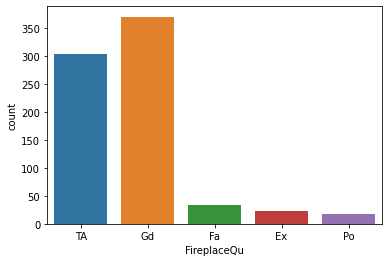

In [157]:
sns.countplot(df.FireplaceQu)

# The most occuring value class id Gd. So, we will replace all null values with mode

In [158]:
df.FireplaceQu.mode()[0]

'Gd'

In [159]:
df[df.FireplaceQu.isnull()==True].index

Int64Index([   1,    6,   11,   13,   16,   19,   20,   27,   30,   31,
            ...
            1437, 1439, 1445, 1446, 1447, 1449, 1453, 1455, 1459, 1460],
           dtype='int64', name='Id', length=591)

In [160]:
df["FireplaceQu"] = df["FireplaceQu"].fillna(df.FireplaceQu.mode()[0])

In [161]:
df.FireplaceQu.isnull().sum()

0

In [163]:
df.isnull().sum()[:40]

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
dtype: int64

In [164]:
df.isnull().sum()[40:]

Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

# ALL THE MISSING VALUES HAS BEEN HANDLED SUCCESSFULLY

In [165]:
df.to_csv("data_missing_handled.csv")

In [166]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [168]:
df.shape

(1338, 76)